In [12]:
# Import pandas library for data manipulation
import pandas as pd

# Read in data into a dataframe 
flight_data = pd.read_csv("./data/train.csv", parse_dates=['Flight_Date','Request_Date'])

# Display top of dataframe
flight_data.head()

,Request_Date,Flight_Date,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency,min_future_price
0,2019-06-03 11:00:00+00:00,2019-06-05,19,2019-06-05 FR 146,SXF-STN,FR 146,208.07,€,259.07
1,2019-06-03 23:00:00+00:00,2019-06-05,19,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07
2,2019-06-04 11:00:00+00:00,2019-06-05,19,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07
3,2019-06-04 23:00:00+00:00,2019-06-05,19,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07
4,2019-06-03 11:00:00+00:00,2019-06-05,21,2019-06-05 FR 147,STN-SXF,FR 147,127.49,£,223.37


In [13]:
# See the column data types and non-missing values 
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83624 entries, 0 to 83623
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Request_Date      83624 non-null  datetime64[ns, UTC]
 1   Flight_Date       83624 non-null  datetime64[ns]     
 2   Departure_hour    83624 non-null  int64              
 3   flight_unique_id  83624 non-null  object             
 4   route_abb         83624 non-null  object             
 5   flight_number     83624 non-null  object             
 6   Price             83624 non-null  float64            
 7   Currency          83624 non-null  object             
 8   min_future_price  83624 non-null  float64            
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 5.7+ MB


In [14]:
print("There are no data quality issues. There are 83.624 instances in the given training data set with no missing data values.") 

There are no data quality issues. There are 83.624 instances in the given training data set with no missing data values.


In [15]:
import numpy as np
import datetime as dt
from datetime import datetime, timedelta

flight_data['Request_Date'] = flight_data['Request_Date'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d %H:%M:%S'))
flight_data['Flight_Date'] =flight_data['Flight_Date'] + pd.to_timedelta(flight_data['Departure_hour'], 'h')

In [16]:
# Transform data type of Request_Date back to datetime64[ns, UTC] 
flight_data['Request_Date'] = pd.to_datetime(flight_data['Request_Date'])

In [17]:
# Create new feature duration time between request and flight date 
Duration_Time = flight_data['Flight_Date'] - flight_data['Request_Date']
Duration_Time = -1 * Duration_Time.apply(lambda x: x.total_seconds())     
Duration_Time = divmod(Duration_Time, 3600)[0]
flight_data.insert(2, "Duration_Time", Duration_Time, True)

In [18]:
flight_data.head()

,Request_Date,Flight_Date,Duration_Time,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency,min_future_price
0,2019-06-03 11:00:00,2019-06-05 19:00:00,-56.0,19,2019-06-05 FR 146,SXF-STN,FR 146,208.07,€,259.07
1,2019-06-03 23:00:00,2019-06-05 19:00:00,-44.0,19,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07
2,2019-06-04 11:00:00,2019-06-05 19:00:00,-32.0,19,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07
3,2019-06-04 23:00:00,2019-06-05 19:00:00,-20.0,19,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07
4,2019-06-03 11:00:00,2019-06-05 21:00:00,-58.0,21,2019-06-05 FR 147,STN-SXF,FR 147,127.49,£,223.37


In [19]:
print("Make some plots to find out any trends.")

Make some plots to find out any trends.


In [20]:
# Split the data set into smaller groups, splitted by routes and we receive four groupes
g_routes = flight_data.groupby('route_abb')

In [21]:
# Show the dataframe for each route 
for route_abb, route_abb_df in g_routes:
    print(route_abb)
    print(route_abb_df)

FRA-STN
             Request_Date         Flight_Date  Duration_Time  Departure_hour  \
141   2019-06-03 11:00:00 2019-06-08 18:00:00         -127.0              18   
142   2019-06-03 23:00:00 2019-06-08 18:00:00         -115.0              18   
143   2019-06-04 11:00:00 2019-06-08 18:00:00         -103.0              18   
144   2019-06-04 23:00:00 2019-06-08 18:00:00          -91.0              18   
145   2019-06-05 11:00:00 2019-06-08 18:00:00          -79.0              18   
...                   ...                 ...            ...             ...   
82639 2019-08-01 11:00:00 2019-09-09 18:00:00         -943.0              18   
82640 2019-08-01 23:00:00 2019-09-09 18:00:00         -931.0              18   
82641 2019-08-02 11:00:00 2019-09-09 18:00:00         -919.0              18   
82642 2019-08-02 23:00:00 2019-09-09 18:00:00         -907.0              18   
82643 2019-08-03 11:00:00 2019-09-09 18:00:00         -895.0              18   

         flight_unique_id route

In [22]:
# get a specific group from the splitted data set, we take route STN-FRA
g_stn_fra = g_routes.get_group('STN-FRA')

In [23]:
g_stn_fra.groupby('Duration_Time').Price.agg(['count', 'min', 'max', 'median'])

,count,min,max,median
Duration_Time,,,,
-2360.0,1,39.46,39.46,39.460
-2348.0,2,19.99,39.46,29.725
-2336.0,3,19.99,50.38,39.460
-2325.0,1,19.99,19.99,19.990
-2324.0,3,19.99,50.38,31.200
...,...,...,...,...
-56.0,30,33.04,223.37,119.090
-45.0,10,52.01,265.19,119.105
-44.0,20,52.01,226.43,108.890


In [24]:
route_a_price = g_stn_fra.groupby('Duration_Time').median()
route_a_price.index.name = 'Duration_Time'
route_a_price.reset_index(inplace=True)
route_a_price.head()

,Duration_Time,Departure_hour,Price,min_future_price
0,-2360.0,19,39.460,19.990
1,-2348.0,13,29.725,18.985
2,-2336.0,19,39.460,19.990
3,-2325.0,8,19.990,19.990
4,-2324.0,19,31.200,19.990


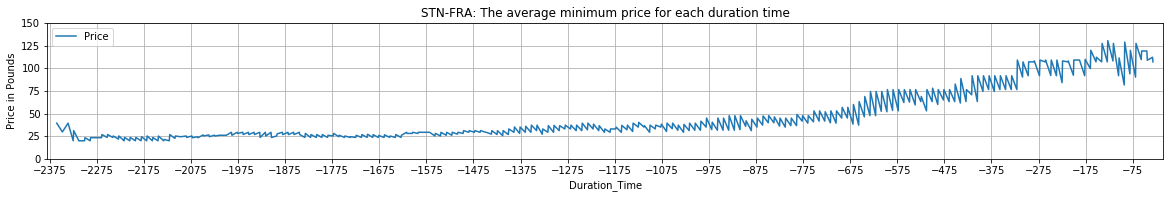

In [25]:
# print("The average minimum price for each route to hours before flight")
from matplotlib import pyplot as plt
from pandas import DataFrame

df = DataFrame(route_a_price,columns=['Duration_Time','Price'])
df.plot(x = 'Duration_Time', y='Price', kind = 'line', figsize=(20,2.5))

plt.xlabel('Duration_Time')
plt.ylabel('Price in Pounds')
plt.title('STN-FRA: The average minimum price for each duration time')

plt.grid(True)
plt.xlim(-2380, -10)
plt.ylim(0, 150)
plt.xticks(np.arange(Duration_Time.min(), Duration_Time.max(), 100))

plt.show()

In [26]:
# get a specific group from the splitted data set, we take route FRA-STN
g_fra_stn = g_routes.get_group('FRA-STN')

In [27]:
g_fra_stn.groupby('Duration_Time').Price.agg(['count', 'min', 'max', 'median'])

,count,min,max,median
Duration_Time,,,,
-2359.0,1,30.33,30.33,30.33
-2347.0,2,19.99,30.33,25.16
-2335.0,3,19.99,30.33,30.33
-2324.0,1,30.33,30.33,30.33
-2323.0,3,19.99,30.33,25.13
...,...,...,...,...
-55.0,26,79.47,311.09,157.07
-44.0,8,106.07,262.13,153.50
-43.0,21,88.73,264.17,208.07


In [28]:
route_b_price = g_fra_stn.groupby('Duration_Time').median()
route_b_price.index.name = 'Duration_Time'
route_b_price.reset_index(inplace=True)
route_b_price.head()

,Duration_Time,Departure_hour,Price,min_future_price
0,-2359.0,18,30.33,19.990
1,-2347.0,12,25.16,18.985
2,-2335.0,18,30.33,19.990
3,-2324.0,7,30.33,17.990
4,-2323.0,18,25.13,19.990


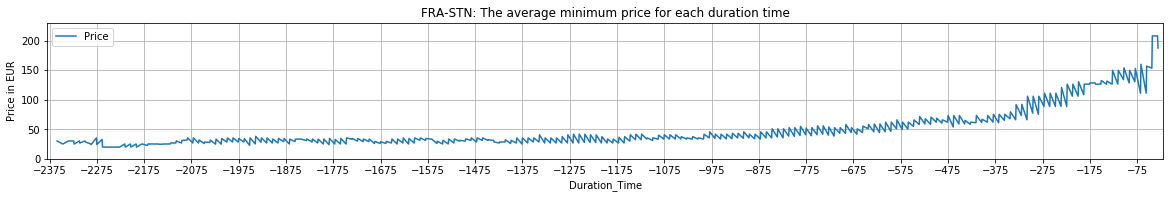

In [29]:
# print("The average minimum price for each route to hours before flight")
df = DataFrame(route_b_price,columns=['Duration_Time','Price'])
df.plot(x = 'Duration_Time', y='Price', kind = 'line', figsize=(20,2.5))

plt.xlabel('Duration_Time')
plt.ylabel('Price in EUR')
plt.title('FRA-STN: The average minimum price for each duration time')

plt.grid(True)
plt.xlim(-2380, -20)
plt.ylim(0, 230)
plt.xticks(np.arange(Duration_Time.min(), Duration_Time.max(), 100))

plt.show()

In [30]:
# get a specific group from the splitted data set, we take route STN-SXF
g_stn_sxf = g_routes.get_group('STN-SXF')

In [31]:
g_stn_sxf.groupby('Duration_Time').Price.agg(['count', 'min', 'max', 'median'])

,count,min,max,median
Duration_Time,,,,
-2372.0,1,19.99,19.99,19.99
-2371.0,1,19.99,19.99,19.99
-2360.0,3,19.99,19.99,19.99
-2359.0,1,19.99,19.99,19.99
-2348.0,4,19.99,19.99,19.99
...,...,...,...,...
-32.0,54,74.45,228.47,182.57
-31.0,21,25.29,228.47,186.21
-22.0,4,88.73,223.37,127.49


In [32]:
route_c_price = g_stn_sxf.groupby('Duration_Time').median()
route_c_price.index.name = 'Duration_Time'
route_c_price.reset_index(inplace=True)
route_c_price.head()

,Duration_Time,Departure_hour,Price,min_future_price
0,-2372.0,7,19.99,9.99
1,-2371.0,6,19.99,9.99
2,-2360.0,19,19.99,17.99
3,-2359.0,6,19.99,9.99
4,-2348.0,13,19.99,13.99


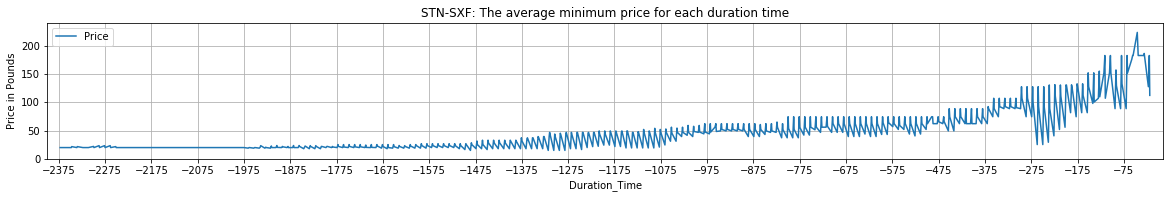

In [33]:
# print("The average minimum price for each route to hours before flight")
df = DataFrame(route_c_price,columns=['Duration_Time','Price'])
df.plot(x = 'Duration_Time', y='Price', kind = 'line', figsize=(20,2.5))

plt.xlabel('Duration_Time')
plt.ylabel('Price in Pounds')
plt.title('STN-SXF: The average minimum price for each duration time')

plt.grid(True)
plt.xlim(-2400, 10)
plt.ylim(0, 240)
plt.xticks(np.arange(Duration_Time.min(), Duration_Time.max(), 100))

plt.show()

In [35]:
# get a specific group from the splitted data set, we take route SXF-STN
g_sxf_stn = g_routes.get_group('SXF-STN')

In [36]:
g_sxf_stn.groupby('Duration_Time').Price.agg(['count', 'min', 'max', 'median'])

,count,min,max,median
Duration_Time,,,,
-2375.0,1,28.55,28.55,28.55
-2371.0,1,19.99,19.99,19.99
-2363.0,2,19.99,28.55,24.27
-2359.0,2,19.99,73.43,46.71
-2351.0,3,25.13,28.55,25.13
...,...,...,...,...
-31.0,57,50.99,266.13,180.53
-23.0,51,50.99,266.13,208.07
-22.0,1,111.17,111.17,111.17


In [37]:
route_d_price = g_sxf_stn.groupby('Duration_Time').median()
route_d_price.index.name = 'Duration_Time'
route_d_price.reset_index(inplace=True)
route_d_price.head()

,Duration_Time,Departure_hour,Price,min_future_price
0,-2375.0,10,28.55,9.99
1,-2371.0,6,19.99,9.99
2,-2363.0,16,24.27,16.82
3,-2359.0,12,46.71,27.94
4,-2351.0,10,25.13,23.65


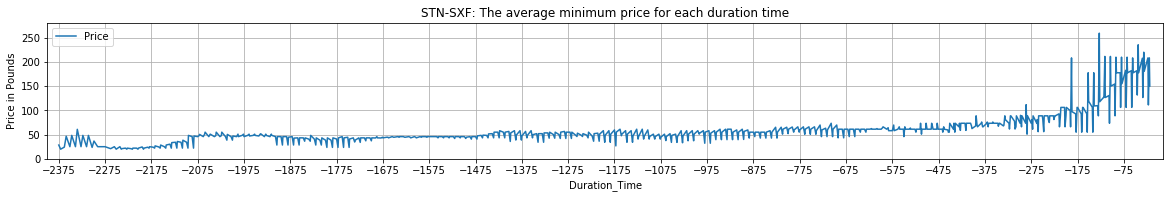

In [38]:
# print("The average minimum price for each route to hours before flight")
df = DataFrame(route_d_price,columns=['Duration_Time','Price'])
df.plot(x = 'Duration_Time', y='Price', kind = 'line', figsize=(20,2.5))

plt.xlabel('Duration_Time')
plt.ylabel('Price in Pounds')
plt.title('STN-SXF: The average minimum price for each duration time')

plt.grid(True)
plt.xlim(-2400, 10)
plt.ylim(0, 280)
plt.xticks(np.arange(Duration_Time.min(), Duration_Time.max(), 100))

plt.show()

In [39]:
# Aggregated Average Minimum Price for all routes 
route_all_price = flight_data.groupby('Duration_Time').median()
route_all_price.index.name = 'Duration_Time'
route_all_price.reset_index(inplace=True)
route_all_price.head()

,Duration_Time,Departure_hour,Price,min_future_price
0,-2375.0,10,28.55,9.99
1,-2372.0,7,19.99,9.99
2,-2371.0,6,19.99,9.99
3,-2363.0,16,24.27,16.82
4,-2360.0,19,19.99,17.99


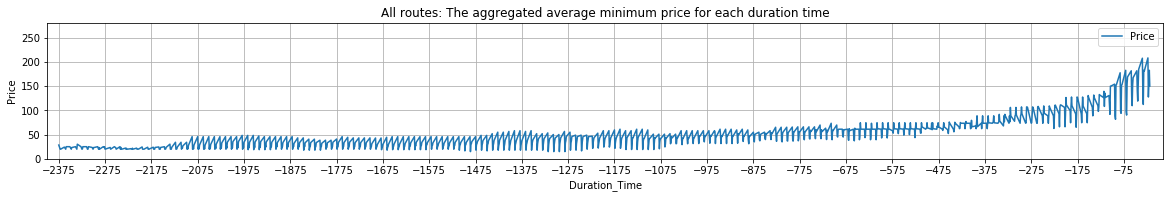

In [40]:
# print("The average minimum price for each route to hours before flight")
df = DataFrame(route_all_price,columns=['Duration_Time','Price'])
df.plot(x = 'Duration_Time', y='Price', kind = 'line', figsize=(20,2.5))

plt.xlabel('Duration_Time')
plt.ylabel('Price')
plt.title('All routes: The aggregated average minimum price for each duration time')

plt.grid(True)
plt.xlim(-2400, 10)
plt.ylim(0, 280)
plt.xticks(np.arange(Duration_Time.min(), Duration_Time.max(), 100))

plt.show()

In [41]:
# Read in data into a dataframe 
train_data = pd.read_csv("./data/converted_train_2020_07_09_00-15-27.csv", parse_dates=['Flight_Date','Request_Date'])
train_data.head()

,Unnamed: 0,Request_Date,Flight_Date,Duration_Time,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency,min_future_price,price_in_eur,min_future_price_in_eur,Request_Weekday,Request_timeofday,Departure_timeofday,flight_distance_km,Request_hour
0,0,2019-06-03,2019-06-05,56.0,19:00,2019-06-05 FR 146,SXF-STN,FR 146,208.07,€,259.07,208.070000,259.070000,Monday,Morning,Evening,907.2,11:00
1,1,2019-06-03,2019-06-05,44.0,19:00,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07,259.070000,259.070000,Monday,Night,Evening,907.2,23:00
2,2,2019-06-04,2019-06-05,32.0,19:00,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07,259.070000,259.070000,Tuesday,Morning,Evening,907.2,11:00
3,3,2019-06-04,2019-06-05,20.0,19:00,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07,259.070000,259.070000,Tuesday,Night,Evening,907.2,23:00
4,4,2019-06-03,2019-06-05,58.0,21:00,2019-06-05 FR 147,STN-SXF,FR 147,127.49,£,223.37,112.979088,197.946027,Monday,Morning,Night,907.2,11:00


In [45]:
train_data['Request_Weekday_num'] = train_data.Request_Weekday.map({'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6 })

In [50]:
# Split the data set into smaller groups, splitted by routes and we receive four groupes
g_weekday = train_data.groupby('Request_Weekday_num')

In [53]:
# Show the dataframe for each weekday 
for Request_Weekday_num, Request_Weekday_num_df in g_weekday:
    print(Request_Weekday_num)
    print(Request_Weekday_num_df)

0
       Unnamed: 0 Request_Date Flight_Date  Duration_Time Departure_hour  \
0               0   2019-06-03  2019-06-05           56.0          19:00   
1               1   2019-06-03  2019-06-05           44.0          19:00   
4               4   2019-06-03  2019-06-05           58.0          21:00   
5               5   2019-06-03  2019-06-05           46.0          21:00   
8               8   2019-06-03  2019-06-05           59.0          22:00   
...           ...          ...         ...            ...            ...   
83586       83586   2019-07-15  2019-09-10         1355.0          10:00   
83599       83599   2019-07-22  2019-09-10         1199.0          10:00   
83600       83600   2019-07-22  2019-09-10         1187.0          10:00   
83613       83613   2019-07-29  2019-09-10         1031.0          10:00   
83614       83614   2019-07-29  2019-09-10         1019.0          10:00   

         flight_unique_id route_abb flight_number   Price Currency  \
0       2019-06

In [69]:
# get a specific group from the splitted data set, we take weekday 0
g_monday = g_weekday.get_group(0)

In [70]:
g_monday.groupby('Duration_Time').Price.agg(['count', 'min', 'max', 'median'])

,count,min,max,median
Duration_Time,,,,
19.0,8,46.81,259.07,165.230
20.0,9,93.83,228.47,182.570
23.0,11,50.99,264.13,208.070
31.0,18,25.29,262.13,165.230
32.0,18,74.45,263.15,169.085
...,...,...,...,...
2360.0,4,19.99,39.46,19.990
2363.0,2,19.99,28.55,24.270
2371.0,2,19.99,19.99,19.990


In [72]:
price_monday = g_monday.groupby('Duration_Time').median()
price_monday.index.name = 'Duration_Time'
price_monday.reset_index(inplace=True)
price_monday.head()

,Duration_Time,Unnamed: 0,Price,min_future_price,price_in_eur,min_future_price_in_eur,flight_distance_km,Request_Weekday_num
0,19.0,14298.0,165.230,165.23,165.230000,165.230000,907.2,0.0
1,20.0,2109.0,182.570,182.57,162.867046,162.867046,907.2,0.0
2,23.0,8392.0,208.070,208.07,208.070000,208.070000,907.2,0.0
3,31.0,6682.5,165.230,177.47,165.230000,177.470000,907.2,0.0
4,32.0,4874.0,169.085,182.57,151.234127,162.903560,907.2,0.0


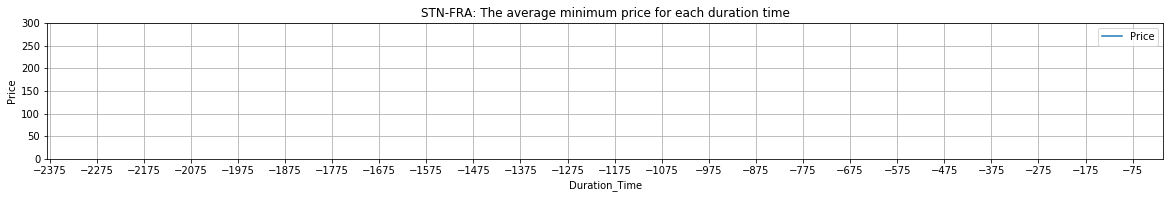

In [68]:
# print("The average minimum price for each route to hours before flight")
from matplotlib import pyplot as plt
from pandas import DataFrame

df = DataFrame(price_monday,columns=['Duration_Time','Price'])
df.plot(x = 'Duration_Time', y='Price', kind = 'line', figsize=(20,2.5))

plt.xlabel('Duration_Time')
plt.ylabel('Price')
plt.title('STN-FRA: The average minimum price for each duration time')

plt.grid(True)
plt.xlim(-2380, -10)
plt.ylim(0, 300)
plt.xticks(np.arange(Duration_Time.min(), Duration_Time.max(), 100))

plt.show()